In [2]:
%matplotlib inline
import json
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:

fidWhite = 'sample_data/white_mouse_100_output.manifest'

# first read the json for each mouse:
data_White = []
for line in open(fidWhite,'r'):
    data_White.append(json.loads(line))


In [26]:
eval(data_White[0]['annotatedResult']['annotationsFromAllWorkers'][0]['annotationData']['content'])

{'annotatedResult': {'inputImageProperties': {'height': 906, 'width': 1250},
  'keypoints': [{'label': 'nose', 'x': 916, 'y': 455},
   {'label': 'right ear', 'x': 942, 'y': 413},
   {'label': 'left ear', 'x': 846, 'y': 415},
   {'label': 'top of neck', 'x': 928, 'y': 418},
   {'label': 'right rear knee', 'x': 842, 'y': 600},
   {'label': 'left rear knee', 'x': 809, 'y': 587},
   {'label': 'base of tail', 'x': 792, 'y': 486}]}}

In [27]:
nSamp = 100
allPts = np.zeros((nSamp,2,7,6))
order = ['nose','right ear','left ear','top of neck','right rear knee','left rear knee','base of tail']

hits = [False]*nSamp
images = ['']*nSamp
sourceStr = os.path.dirname(data_White[0]['source-ref'])
pth = 'D:\\Dropbox\\research\\SFARI_MARS\\AMT_reannotation\\datasets\\white_100\\' # local path to source images
keyName = 'annotatedResult'

workerCount=0
for f,frame in enumerate(data_White):
    if (keyName in frame.keys()):
        hits[f]=True
        images[f] = frame['source-ref'].replace(sourceStr,pth) # loading the local path to the image
        
        for w,worker in enumerate(frame[keyName]['annotationsFromAllWorkers']):
            workerCount=workerCount+1
            # the json of annotations from each worker is stored as a string for security reasons.
            # we'll use eval to convert it into a dict:
            annot = eval(worker['annotationData']['content'])

            # now we can unpack this worker's annotations for each keypoint:
            for pt in annot[keyName]['keypoints']:
                idx = order.index(pt['label'])
                allPts[f,0,idx,w] = pt['x']
                allPts[f,1,idx,w] = pt['y']


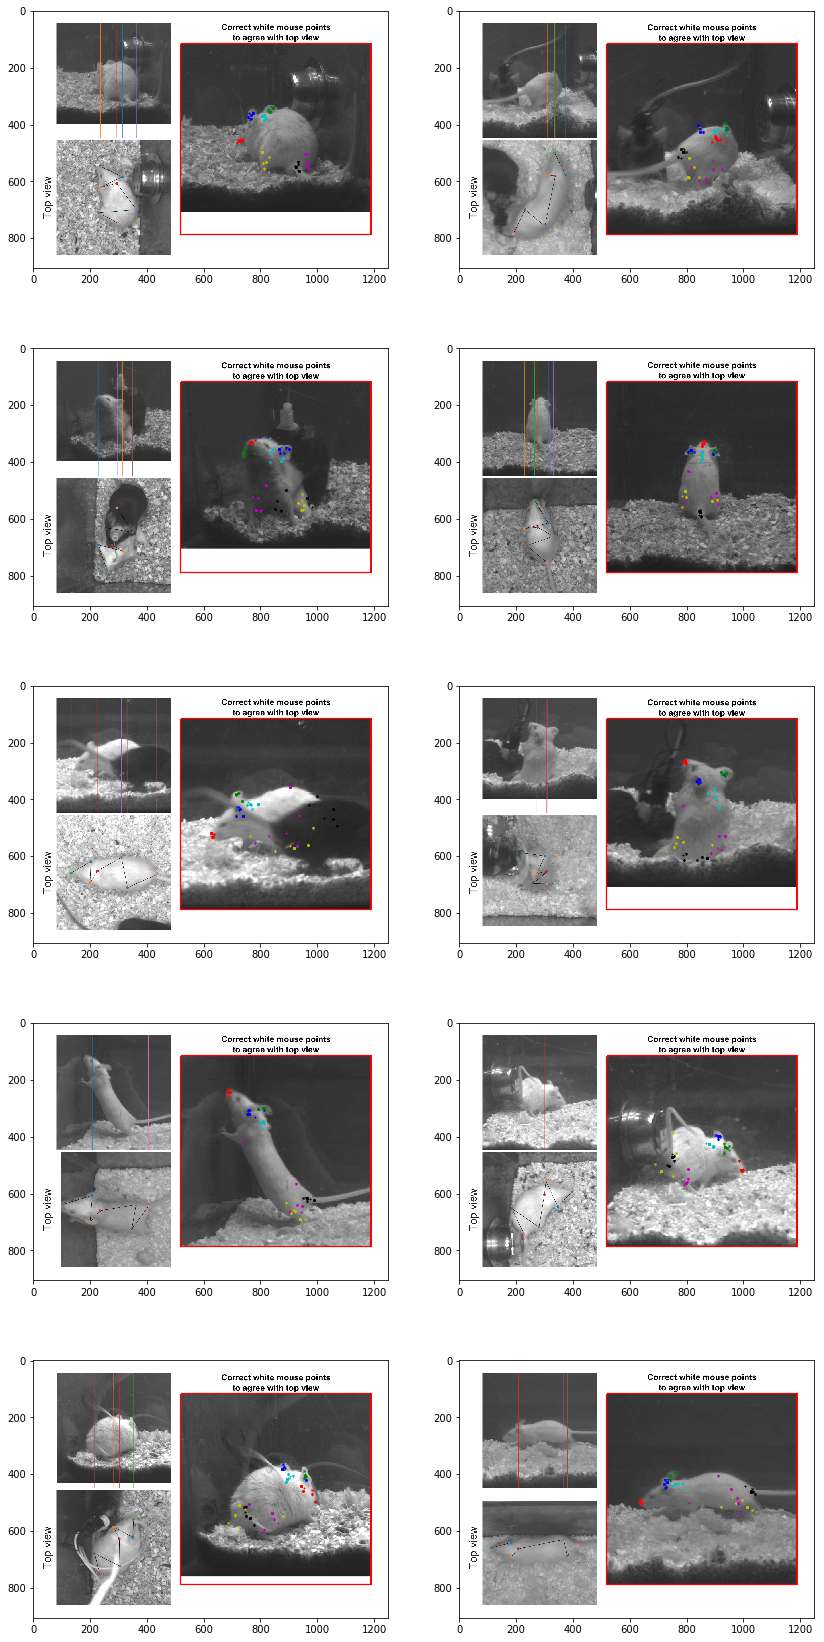

In [37]:
fig,ax = plt.subplots(5,2,figsize=(14, 30))
for fr in range(0,10):
    im = mpimg.imread(images[fr])
    ax[int(fr/2),(fr+1)%2].imshow(im);
    colors='rgbcmyk'
    markers = 'v+xosd'
    for w in range(6):
        for pt in range(7):
            ax[int(fr/2),(fr+1)%2].plot(np.squeeze(allPts[fr,0,pt,w]),np.squeeze(allPts[fr,1,pt,w]), colors[pt] + markers[w], markersize=2)
        
fig.savefig("white-mouse-test-100.pdf", bbox_inches='tight')